# Logistic Regression – LIC Stock Price Movement

**Name:** Satheesh B

**Roll No:** 24BAD107

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)



In [ ]:

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "LICI - 10 minute data.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "debashis74017/lic-stock-price-data",
    file_path,
)

df.head()



Using Colab cache for faster access to the 'lic-stock-price-data' dataset.


,date,open,high,low,close,volume
0,2022-05-17 09:35:00+05:30,872.00,872.00,872.0,872.00,3759243
1,2022-05-17 09:45:00+05:30,872.00,872.00,872.0,872.00,0
2,2022-05-17 09:55:00+05:30,872.00,918.10,862.0,902.80,12449251
3,2022-05-17 10:05:00+05:30,902.45,908.95,896.0,902.15,5237329
4,2022-05-17 10:15:00+05:30,902.30,905.00,900.0,903.85,1820317


In [ ]:

# Create target variable
df['Price_Movement'] = (df['close'] > df['open']).astype(int)


In [ ]:

# Select features and target
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['Price_Movement']


In [ ]:

# Handle missing values
X.fillna(X.mean(), inplace=True)


/tmp/ipython-input-972322814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]


In [ ]:

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6132971506105834
Precision: 1.0
Recall: 0.030612244897959183
F1 Score: 0.0594059405940594
Confusion Matrix:
 [[443   0]
 [285   9]]


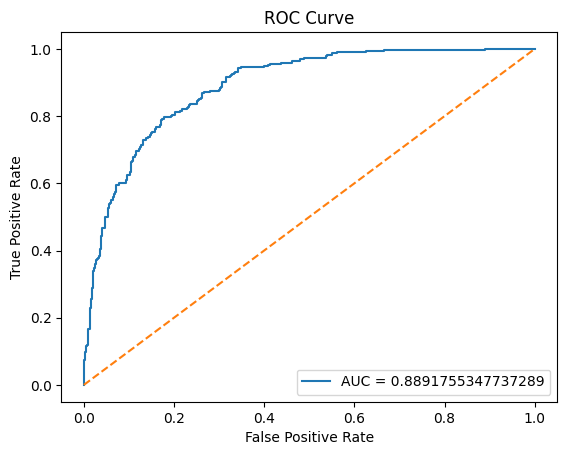

In [ ]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="AUC = " + str(roc_auc))
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:

# Feature importance (coefficients)
for feature, coef in zip(features, log_reg.coef_[0]):
    print(feature, coef)


open -6.396030534220561
high 4.100662757369388
low 2.301069325019617
volume -0.0191894736133052


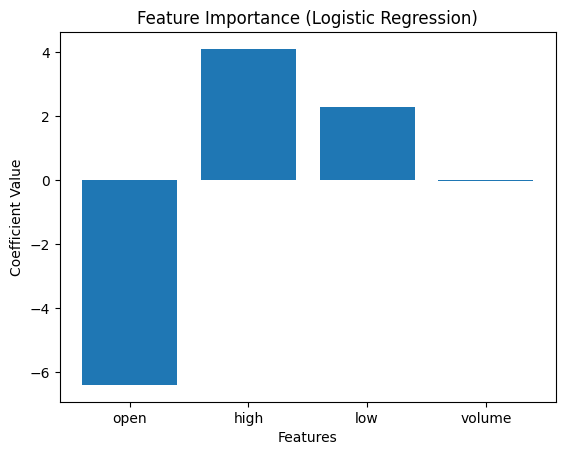

In [ ]:
import matplotlib.pyplot as plt

plt.bar(features, log_reg.coef_[0])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.show()


In [ ]:

# Hyperparameter tuning with regularization
log_reg_l2 = LogisticRegression(C=0.5, penalty='l2')
log_reg_l2.fit(X_train, y_train)

print("Tuned Accuracy:", log_reg_l2.score(X_test, y_test))


Tuned Accuracy: 0.6051560379918589
